In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.signal import find_peaks,peak_widths
from skimage import exposure
from skimage.restoration import denoise_tv_chambolle,estimate_sigma,denoise_bilateral

([], <a list of 0 Text yticklabel objects>)

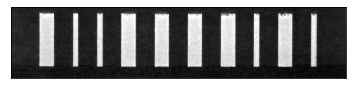

In [152]:
npImage=np.array(Image.open("C:/Users/Varun Makdani/Desktop/Python Prac/Image Learning/1WS_CT_cropped.jpg").convert("L"))
plt.imshow(npImage,cmap="gray")
plt.xticks([])
plt.yticks([])

In [70]:
# npImage_tv_denoised = denoise_tv_chambolle(npImage,weight=0.10,multichannel=False)
# plt.imshow(npImage_tv_denoised,cmap="gray",interpolation="nearest")
# plt.xticks([])
# plt.yticks([])

In [153]:
sigma_est = estimate_sigma(npImage,multichannel=False,average_sigmas=True)
sigma_est

0.5311469527430259

([], <a list of 0 Text yticklabel objects>)

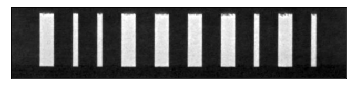

In [154]:
gauss_denoised = ndimage.gaussian_filter(npImage, sigma_est )#,sigma_est)

plt.imshow(gauss_denoised, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

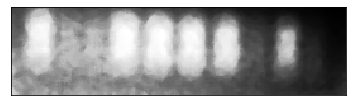

In [46]:
median_denoised = ndimage.median_filter(gauss_denoised,size=5)#,sigma_est)

plt.imshow(median_denoised, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

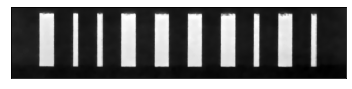

In [156]:
tvchambole_denoised = denoise_tv_chambolle(gauss_denoised,weight=0.05,multichannel=False)
plt.imshow(tvchambole_denoised, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

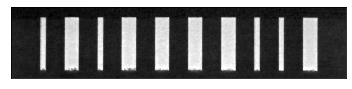

In [103]:
image_bilateral_denoised = denoise_bilateral(npImage,sigma_color=0.01,sigma_spatial=5,multichannel =False)
plt.imshow(image_bilateral_denoised, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])


([], <a list of 0 Text yticklabel objects>)

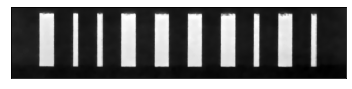

In [158]:
image_equalized = exposure.equalize_hist(tvchambole_denoised)
image_rescale_int = exposure.rescale_intensity(255*tvchambole_denoised,in_range=(0,255))
plt.imshow(image_rescale_int, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

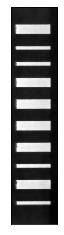

In [159]:
image_equalized_rotated =np.transpose(255 * image_rescale_int)#(255 * image_equalized)
plt.imshow(image_equalized_rotated, cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [160]:
middle_col_image_index = (int) (image_equalized_rotated.shape[1]/2)
print(middle_col_image_index)

68


([], <a list of 0 Text yticklabel objects>)

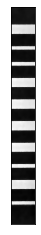

In [161]:
middle_col_img = np.array(image_equalized_rotated[:,middle_col_image_index-35:middle_col_image_index+35])

plt.imshow(middle_col_img,cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [167]:
middle_col_img_avg = np.average(middle_col_img,axis=1)
max_value = np.max(middle_col_img_avg) #to be calculated statistically or maximum of the found values
peaks = find_peaks(middle_col_img_avg,height=(100,max_value),distance=25,prominence=10)
graph_widths = peak_widths(middle_col_img_avg, peaks[0], rel_height=0.1)

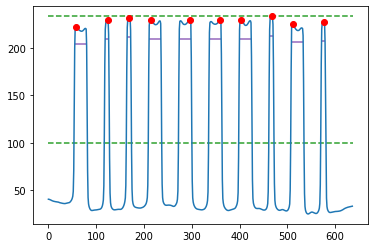

In [168]:
plt.plot(middle_col_img_avg)
plt.hlines(max_value,0,middle_col_img_avg.shape[0],colors="C2",linestyles="dashed")
plt.hlines(100,0,middle_col_img_avg.shape[0],colors="C2",linestyles="dashed")
plt.hlines(*graph_widths[1:], color="C4")
plt.plot(peaks[0],middle_col_img_avg[peaks[0]],'ro')

In [164]:
width_average = np.average(graph_widths[0])

In [165]:
plot_widths_squared = graph_widths[0] * graph_widths[0]
plot_heights_squared = (middle_col_img_avg[peaks[0]] - graph_widths[1]) * (middle_col_img_avg[peaks[0]]-graph_widths[1])
#print(middle_col_img_avg[peaks[0]])
#print(graph_widths[1])
plot_width_height_regularised = np.sqrt(plot_widths_squared + plot_heights_squared)
plot_width_height_regularised_avg = np.average(plot_width_height_regularised)
print(plot_width_height_regularised)
print(plot_width_height_regularised_avg)


[30.98475053 21.36792828 21.66437827 31.6960469  31.56229386 31.79564853
 31.81585751 21.82745053 31.4984183  21.44589516]
27.56586678589727


In [166]:
code = np.array(())
for plot_w_h in plot_width_height_regularised:
    if(plot_w_h  < plot_width_height_regularised_avg):
        code = np.append(code,0)
    else:
        code = np.append(code,1)
print(code.astype(int))


[1 0 0 1 1 1 1 0 1 0]
